##prophet 파라미터 정리
- changepoint_prior_scale : 0.05 [default]  
  - 추세에 따라 데이터를 유연하게 반영할 건지 추세에 유연하지 않게 반영할 건지 결정하는 parameter
  - 추세에 덜 유연하게 반영하려면 default 값인 0.05보다 작게 설정
  - 추세에 유연하게 반영하려면 0.05보다 크게 설정
  - 기준일에 전날까지 반영할 거면 lower_window = -1, upper_window = 0
  - 기준일에 다음날까지 반영하면 lower_window = 0, upper_window = 1
- seasonality_prior_scale : 10 [default]
  - 계절의 유연성을 제어하는 parameter 값이 크면 계절성의 영향이 커지고 값이 작아지면 계절성의 영향이 줄어듦
  - 합리적인 조정 범위는 [0.01,10] 사이
- holidays_prior_scale : 10.0 [default]
  - 휴일의 영향에 따라 유연성을 조절하는 parameter
  - 조절 범위는 [0.01,10]
- seasonality_mode : 'additive' [default]
  - 옵션에는 ['addtive','multiflicative']
  - 'addtive' : 시계열 데이터가 진폭이 일정할 때 사용
  - 'multiflicative' : 시계열 데이터의 진폭이 점점 증가하거나 감소할 때 사용
- changepoint_range : 0.8 [default]
  - change point의 설정 가능 범위를 의미
  - 0.8 이면 데이터의 80% 중 changepoint를 자동으로 설정함
  - 조절 범위 [0.8,0.95]
- growth : linear [default]
  - 옵션 [liner, logistic] 존재
  - prophet logistic을 사용한다고 할 때는 cap, floor이라는 값을 설정
  - 정해진 기준은 없고 모델을 돌리고 확인한 후에 설정하는 것을 추천
- changepoints : auto[default]
  - 변경점을 수동으로 설정하기 위한 parameter
- n_changepoints : 25 [default]
  - 자동으로 배치된 변경점의 수, 일반적인 시계열의 추세 변화를 파악하기 위해서 충분한 수로 설정해야 함.
  - 변경점의 수를 늘리거나 줄이는 것보다 추세 변화에서 유연성을 변경하는 것이 더 효과적일 수 있음
- yearly_seasonality : auto [default]
  - 데이터와 연간 계절성을 가지면 True 아니면 False로 설정 이와 같이 weekly_seasonality,daily_seasonality 존재
  - auto : 알아서 지정
  - true : 강제로 지정
  - 각각의 계절성이 보인다면 키고 seasonality_prior_scale을 조절하는 게 효과적
- holidays
  - 지정된 공휴일의 데이터 프레임을 전달하기 위해서 사용
  - 휴일 효과는 holidays_prior_scale을 통해서 조정
  - add_country_holidays (이벤트 효과 자동 입력)
    - 해당 국가의 이벤트 날짜를 자동으로 넣어준다.
    - country_name으로 국가를 설정한다
- mcmc_samples : 0 [default]
  - 계절성의 불확실성을 확인할 때 사용됨 기본적으로 Prophet은 추세 및 관찰 노이즈의 불확실성만을 반환함
  - 계절성에 대한 불확실성을 얻으려면 전체 베이지안 샘플링을 수행해야 함
- interval_width : 0.8 [default]
  - Prophet의 predict은 yhat_upper, yhat_lower 와 같은 불확실성 구간을 반환함
 - 이것은 불확실성 구간에만 영향을 미치고 예측 yhat을 전혀 변경하지 않으므로 조정할 필요 없음
- uncertainty_samples : 1000 [default]
  - 위와 같이 불확실성의 구간 조정

**출처 : https://velog.io/@choijhyeok/Prophet-1-parameter-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0

In [ ]:
# import necessary libraries
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATA/sales_data.csv',encoding='unicode_escape')

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [ ]:
df_1  = df.copy()

In [ ]:
df_1=df_1[df_1.Quantity>0]
df_1=df_1[df_1.UnitPrice>0]

In [ ]:
df_1['ttp']= df_1['Quantity'] * df_1['UnitPrice']

In [ ]:
# ttp 실제 예측할 변수
df_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ttp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [ ]:
df_psp=df_1[['InvoiceDate','ttp']]

In [ ]:
df_psp.rename(columns={'InvoiceDate':'ds','ttp':'y'},inplace=True)

In [ ]:
df_psp=df_psp.set_index('ds')

In [ ]:
df_f=df_psp.resample('D')['y'].sum()
df_f=df_f.to_frame()

In [ ]:
df_f.reset_index(inplace=True)

In [ ]:
train=df_f[:334]
test = df_f[334:]

###Prophet 기본 세팅

In [ ]:
#prophet 파라미터 세팅
prophet = Prophet(
    growth='linear', #추세
    #Trend
    changepoints = None, #CP가 발생하는 시점 list
    n_changepoints = 25, #CP 수
    changepoint_range = 0.8, #CP의 기존 데이터 수 대비 최대 비율
    changepoint_prior_scale=0.5, # CP 추정 민감도로 높을수록 민감
    #Seasonality
    seasonality_mode='additive', #계절성 모델
    seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
    yearly_seasonality='auto', #연계절성
    weekly_seasonality='auto', #주계절성
    daily_seasonality='auto', #일계절성
    #Holiday
    holidays=None, #휴일 이벤트 수동으로 넣음
    holidays_prior_scale=10.0, #휴일 추정 민감도로 높을수록 민감
    #Other
    interval_width=0.8, #추세 예측 정확도 구간범위
    mcmc_samples=0 #계절성 예측 정확도 제어
)

Exception: ignored

In [ ]:
ph_yhat=forecast[['ds','yhat']][334:] #실제예측한 값

<function matplotlib.pyplot.show(close=None, block=None)>

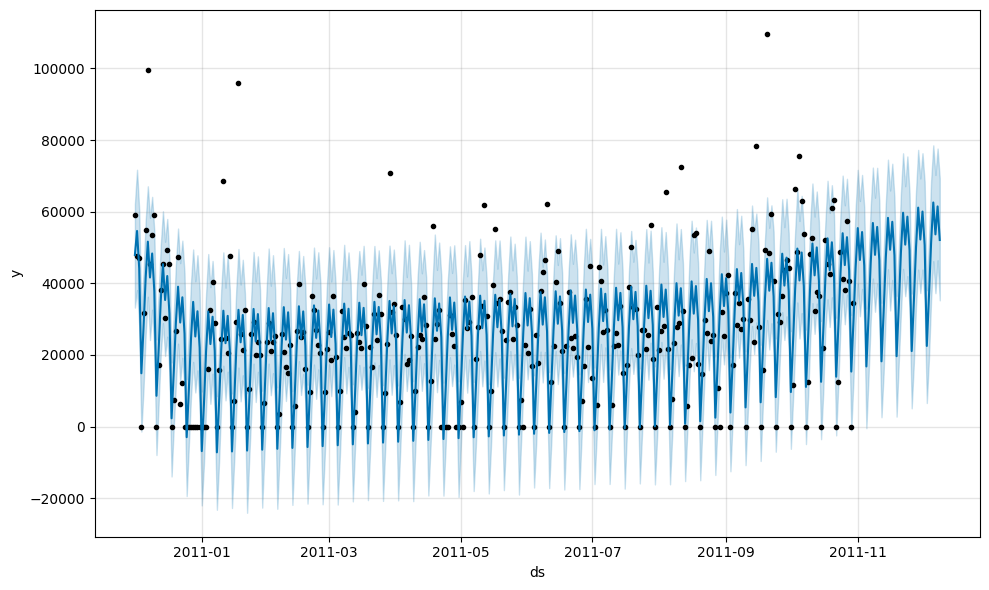

In [ ]:
prophet.plot(forecast)
plt.show

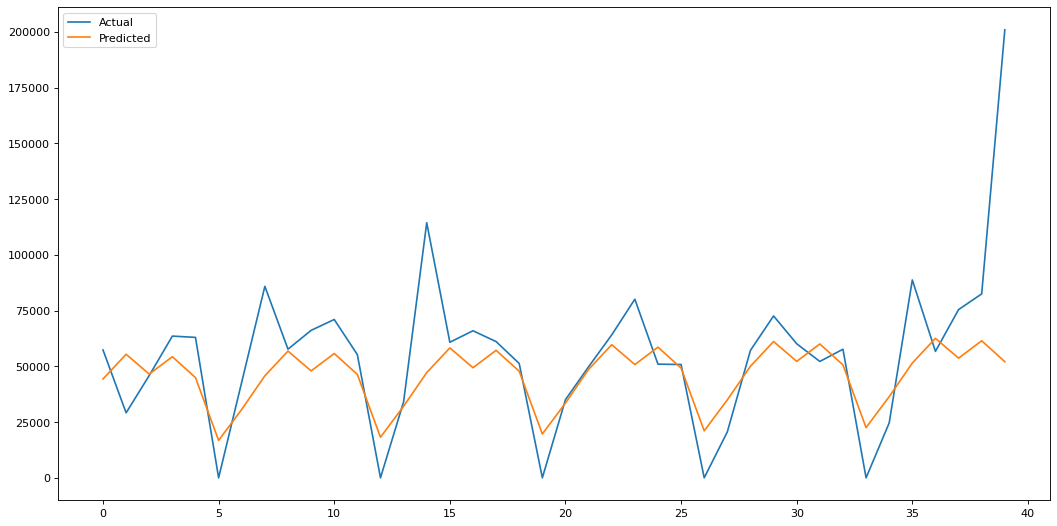

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

###Prophet Trend 파라미터 변경
- changepoint_prior_scale 0.05 -> 5변경

In [ ]:
#prophet 파라미터 세팅
prophet = Prophet(
    growth='linear', #추세
    #Trend
    changepoints = None, #CP가 발생하는 시점 list
    n_changepoints = 25, #CP 수
    changepoint_range = 0.8, #CP의 기존 데이터 수 대비 최대 비율
    changepoint_prior_scale=5, # CP 추정 민감도로 높을수록 민감
    #Seasonality
    seasonality_mode='additive', #계절성 모델
    seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
    yearly_seasonality='auto', #연계절성
    weekly_seasonality='auto', #주계절성
    daily_seasonality='auto', #일계절성
    #Holiday
    holidays=None, #휴일 이벤트 수동으로 넣음
    holidays_prior_scale=10.0, #휴일 추정 민감도로 높을수록 민감
    #Other
    interval_width=0.8, #추세 예측 정확도 구간범위
    mcmc_samples=0 #계절성 예측 정확도 제어
)

In [ ]:
prophet = prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/tzq7tf6w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/yw9120to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61688', 'data', 'file=/tmp/tmpxdrg3g94/tzq7tf6w.json', 'init=/tmp/tmpxdrg3g94/yw9120to.json', 'output', 'file=/tmp/tmpxdrg3g94/prophet_modelsbkp8c_0/prophet_model-20230630093304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:33:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:33:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

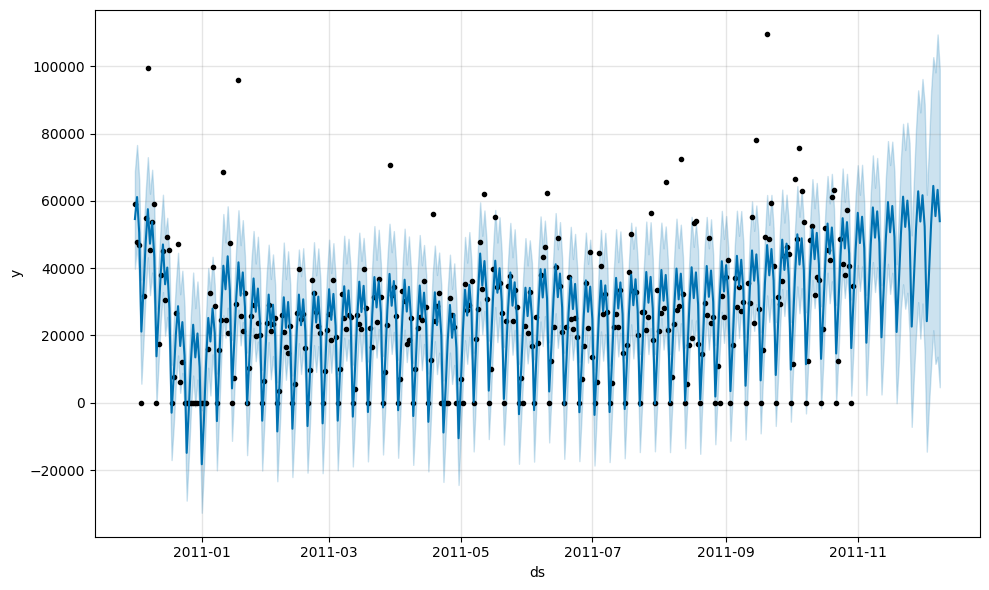

In [ ]:
prophet.plot(forecast)
plt.show

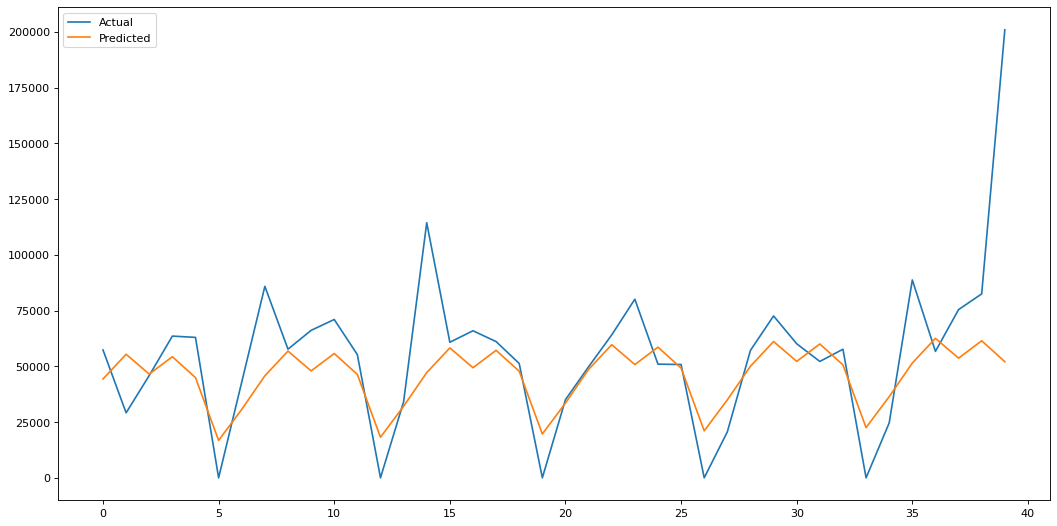

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

- changepoint_prior_scale 0.05 -> 0.005변경

In [ ]:
#prophet 파라미터 세팅
prophet = Prophet(
    growth='linear', #추세
    #Trend
    changepoints = None, #CP가 발생하는 시점 list
    n_changepoints = 25, #CP 수
    changepoint_range = 0.8, #CP의 기존 데이터 수 대비 최대 비율
    changepoint_prior_scale=0.005, # CP 추정 민감도로 높을수록 민감
    #Seasonality
    seasonality_mode='additive', #계절성 모델
    seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
    yearly_seasonality='auto', #연계절성
    weekly_seasonality='auto', #주계절성
    daily_seasonality='auto', #일계절성
    #Holiday
    holidays=None, #휴일 이벤트 수동으로 넣음
    holidays_prior_scale=10.0, #휴일 추정 민감도로 높을수록 민감
    #Other
    interval_width=0.8, #추세 예측 정확도 구간범위
    mcmc_samples=0 #계절성 예측 정확도 제어
)

In [ ]:
prophet = prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/71a3mlpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/wwlynexe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75929', 'data', 'file=/tmp/tmpxdrg3g94/71a3mlpg.json', 'init=/tmp/tmpxdrg3g94/wwlynexe.json', 'output', 'file=/tmp/tmpxdrg3g94/prophet_modelcztfh8y7/prophet_model-20230630093626.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:36:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:36:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

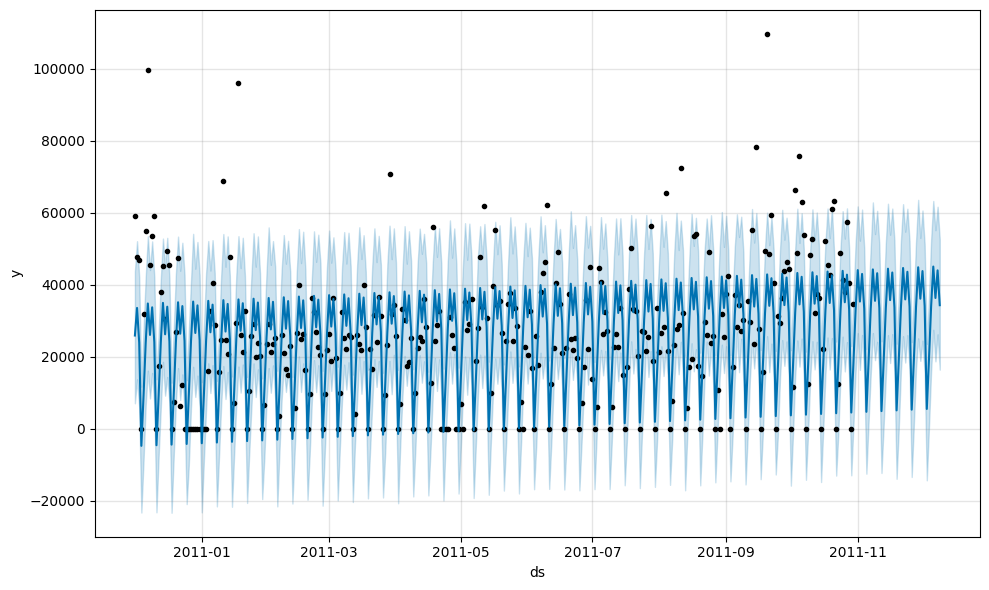

In [ ]:
prophet.plot(forecast)
plt.show

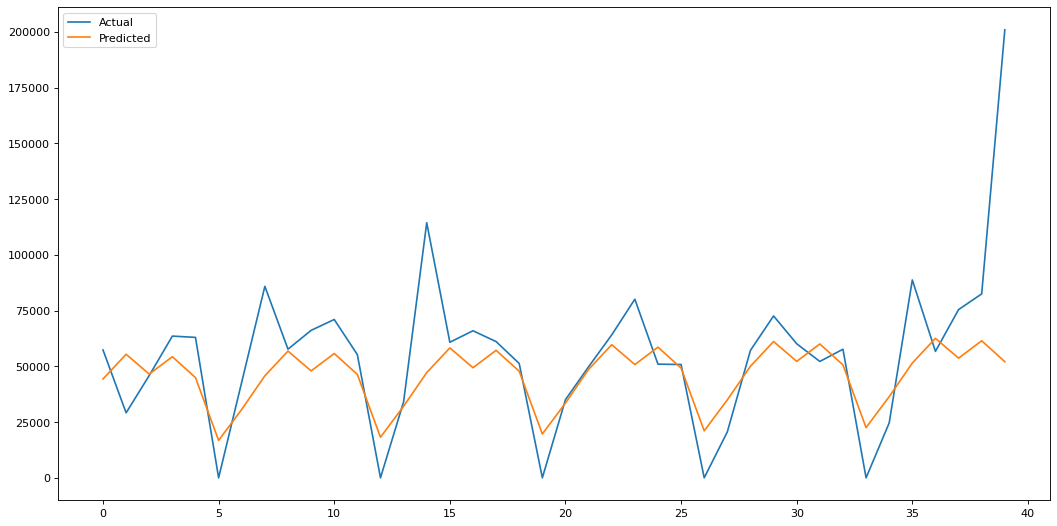

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

plt.plot(test['y'].values, label='Actual')
plt.plot(ph_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

추정민감도를 default값보다 높였을 때 그래프의 변동이 심한반면, 낮췄을 때는 변동이 거의 없다.

### Seasonality 파라미터
- yearly_seasonality 연계졀성 auto -> true변경

In [ ]:
#prophet 파라미터 세팅
prophet = Prophet(
    growth='linear', #추세
    #Trend
    changepoints = None, #CP가 발생하는 시점 list
    n_changepoints = 25, #CP 수
    changepoint_range = 0.8, #CP의 기존 데이터 수 대비 최대 비율
    changepoint_prior_scale=0.5, # CP 추정 민감도로 높을수록 민감
    #Seasonality
    seasonality_mode='additive', #계절성 모델
    seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
    yearly_seasonality=True, #연계절성
    weekly_seasonality='auto', #주계절성
    daily_seasonality='auto', #일계절성
    #Holiday
    holidays=None, #휴일 이벤트 수동으로 넣음
    holidays_prior_scale=10.0, #휴일 추정 민감도로 높을수록 민감
    #Other
    interval_width=0.8, #추세 예측 정확도 구간범위
    mcmc_samples=0 #계절성 예측 정확도 제어
)

In [ ]:
prophet = prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/146j5nj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/ik0knit5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91623', 'data', 'file=/tmp/tmpxdrg3g94/146j5nj7.json', 'init=/tmp/tmpxdrg3g94/ik0knit5.json', 'output', 'file=/tmp/tmpxdrg3g94/prophet_model0vbebxq2/prophet_model-20230630094042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:40:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:40:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

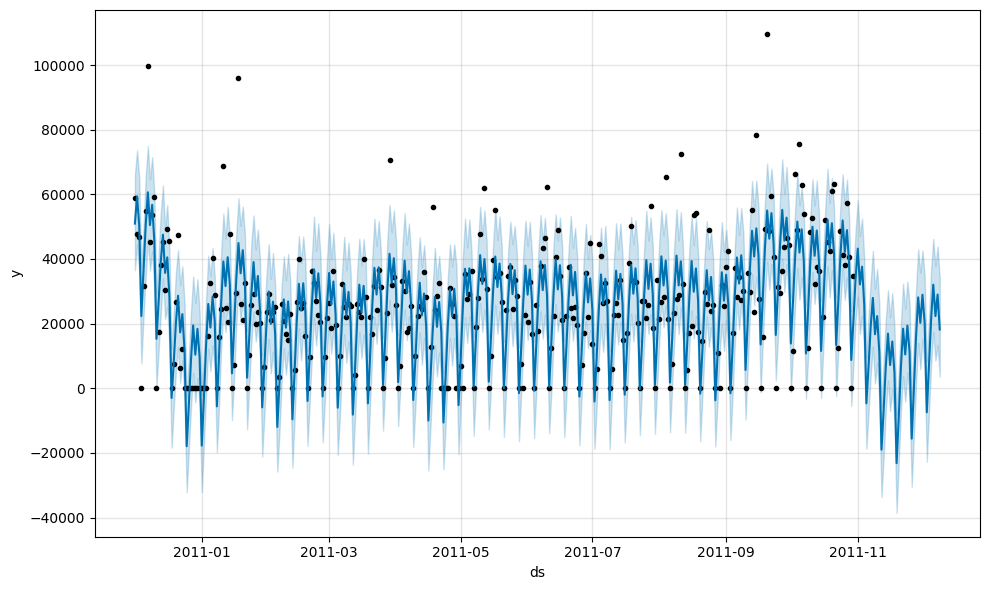

In [ ]:
prophet.plot(forecast)
plt.show

- yearly_seasonality=True로 했을 때 auto와 달리 겨울에 변동이 심한 것을 볼 수 있다.

- seasonality_prior_sacle 10->100 변경

In [ ]:
prophet = Prophet(seasonality_prior_scale=100)

In [ ]:
prophet = prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/j98_fjmu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/p8ptrb_o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54757', 'data', 'file=/tmp/tmpxdrg3g94/j98_fjmu.json', 'init=/tmp/tmpxdrg3g94/p8ptrb_o.json', 'output', 'file=/tmp/tmpxdrg3g94/prophet_modelsmy1fdf0/prophet_model-20230630094327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:43:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:43:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

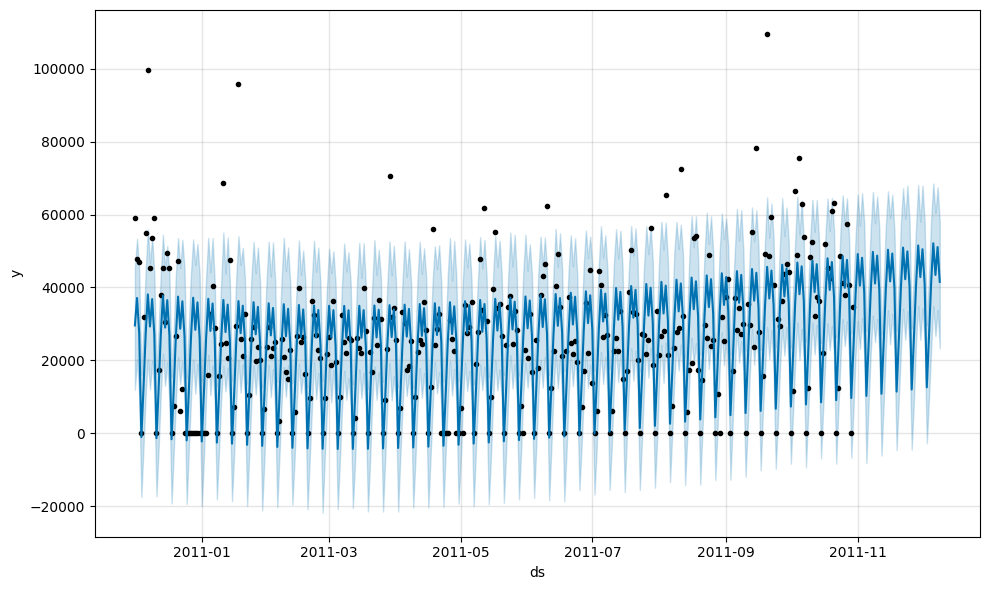

In [ ]:
prophet.plot(forecast)
plt.show

- seasonality_prior_sacle 10->0.1 변경

In [ ]:
prophet = Prophet(seasonality_prior_scale=0.1)
prophet = prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/qjdo90zx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/xr3fkfxj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21577', 'data', 'file=/tmp/tmpxdrg3g94/qjdo90zx.json', 'init=/tmp/tmpxdrg3g94/xr3fkfxj.json', 'output', 'file=/tmp/tmpxdrg3g94/prophet_model0vp87kgr/prophet_model-20230630094417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

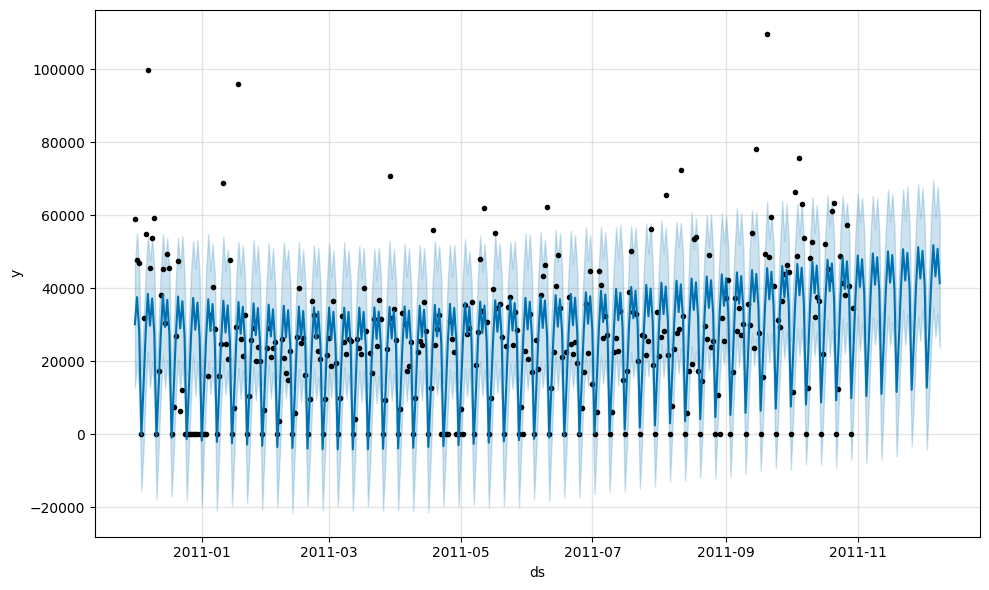

In [ ]:
prophet.plot(forecast)
plt.show

- seasonality_mode : additive -> multiplicative 변경

In [ ]:
#prophet 파라미터 세팅
prophet = Prophet(
    growth='linear', #추세
    #Trend
    changepoints = None, #CP가 발생하는 시점 list
    n_changepoints = 25, #CP 수
    changepoint_range = 0.8, #CP의 기존 데이터 수 대비 최대 비율
    changepoint_prior_scale=0.5, # CP 추정 민감도로 높을수록 민감
    #Seasonality
    seasonality_mode='multiplicative', #계절성 모델
    seasonality_prior_scale=10.0, # 계절성 추정 민감도로 높을수록 민감
    yearly_seasonality='auto', #연계절성
    weekly_seasonality='auto', #주계절성
    daily_seasonality='auto', #일계절성
    #Holiday
    holidays=None, #휴일 이벤트 수동으로 넣음
    holidays_prior_scale=10.0, #휴일 추정 민감도로 높을수록 민감
    #Other
    interval_width=0.8, #추세 예측 정확도 구간범위
    mcmc_samples=0 #계절성 예측 정확도 제어
)

In [ ]:
prophet = prophet.fit(train)
future = prophet.make_future_dataframe(periods=40)
forecast = prophet.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/k7k690d2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxdrg3g94/vej95b7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57141', 'data', 'file=/tmp/tmpxdrg3g94/k7k690d2.json', 'init=/tmp/tmpxdrg3g94/vej95b7z.json', 'output', 'file=/tmp/tmpxdrg3g94/prophet_modelesm6e4h7/prophet_model-20230630094844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:48:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:48:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

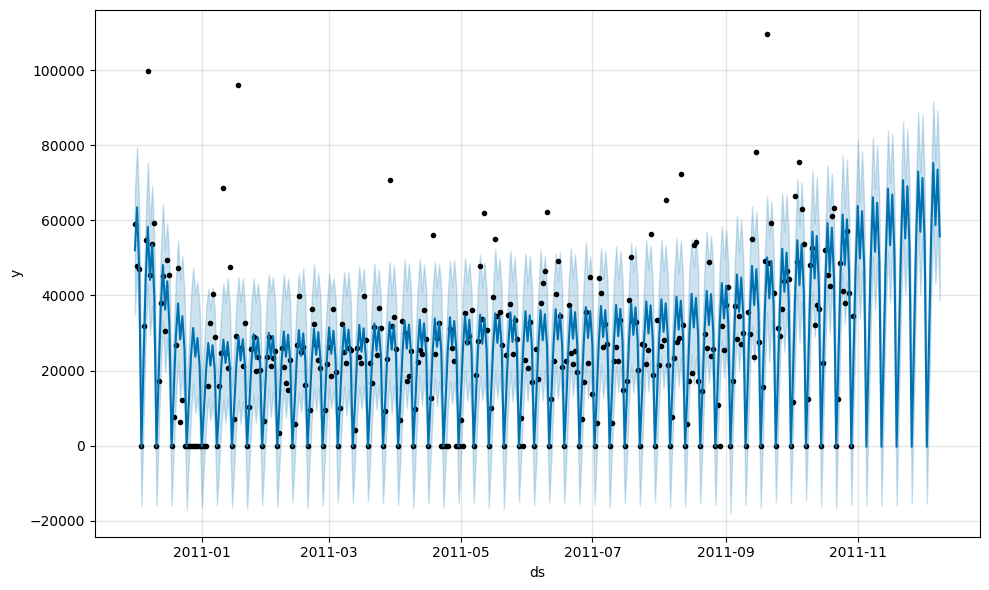

In [ ]:
prophet.plot(forecast)
plt.show